# Import all the dependencies

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data collection 

In [2]:
credit_card_data = pd.read_csv("card_transdata.csv")

In [3]:
credit_card_data.head()

distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0

In [4]:
credit_card_data.tail()

distance_from_home  distance_from_last_transaction  \
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
999995                        1.626798              1.0        1.0   
999996                        2.778303              1.0        1.0   
999997                        0.218075              1.0        1.0   
999998                        0.475822              1.0        0.0   
999999                        0.386920              1.0        1.0   

        used_pin_number  online_order  fraud  
999995              0.0           0.0    0.0  
999996              0.0           0.0    0.0  
999997              0.0           1.0    0.0  
999998              0.0           1.0    0.0  
999999              0.0           1.0    0.0

In [5]:
credit_card_data.shape

(1000000, 8)

In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
credit_card_data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
credit_card_data = credit_card_data.dropna()

In [9]:
# stetistica measures 
credit_card_data.describe()

distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.000000        0.000000   
50%                          0.997717         1.000000        0.000000   
75%                          2.096370         1.000000        1.000000   
max                        267.802942         1.000000        1.000000   

       used_pin_number    online_order           fraud  
count   1000000.000000  1000000.000000  1000000.000000  
mean          0.100608        0.650552        0.087403  
std           0.300809        0.476796        0.282425  
min           0.000000        0.000000        0.000000  
25%           0.000000        0.000000        0.000000  
50%           0.000000        1.000000        0.000000  
75%           0.000000        1.000000        0.000000  
max           1.000000        1.000000        1.000000

# Distribution of legit & Fradulent Transaction

In [10]:
credit_card_data["fraud"].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [11]:
legit_data = credit_card_data[credit_card_data.fraud == 0]
fraud_data = credit_card_data[credit_card_data.fraud == 1]

In [12]:
print(f"Ligit : {legit_data.shape}")
print(f"Fraud : {fraud_data.shape}")

Ligit : (912597, 8)
Fraud : (87403, 8)


In [13]:
legit_data.fraud.describe()

count    912597.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: fraud, dtype: float64

In [14]:
fraud_data.fraud.describe()

count    87403.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: fraud, dtype: float64

In [15]:
# compare the values of both transcation 
credit_card_data.groupby("fraud").mean()

distance_from_home  distance_from_last_transaction  \
fraud                                                       
0.0             22.832976                        4.301391   
1.0             66.261876                       12.712185   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
fraud                                                               
0.0                          1.423642         0.881672   0.359402   
1.0                          6.006323         0.880119   0.256399   

       used_pin_number  online_order  
fraud                                 
0.0           0.109944      0.622225  
1.0           0.003123      0.946318

# under sampling

In [16]:
# build a sample dataset containing similar distribution of normal transaction and fraudulent transaction  

# number of fraudulent Transaction -->87403 
legit_sample = legit_data.sample(n=87403)

# now we concatenating two transaction 

In [17]:
new_dataset = pd.concat([legit_sample, fraud_data], axis=0)

In [18]:
new_dataset.head()

distance_from_home  distance_from_last_transaction  \
133678            1.853227                        1.129355   
770657            3.206974                        0.704494   
153041            4.776634                        0.915712   
595463           75.705078                        0.186282   
458489            7.507087                        1.258732   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
133678                        0.995895              0.0        0.0   
770657                        1.643076              1.0        0.0   
153041                        0.613493              1.0        0.0   
595463                        0.444008              1.0        0.0   
458489                        0.386697              1.0        0.0   

        used_pin_number  online_order  fraud  
133678              0.0           0.0    0.0  
770657              0.0           0.0    0.0  
153041              0.0           0.0    0.0  
595463              0.0           0.0    0.0  
458489              0.0           1.0    0.0

In [19]:
new_dataset.tail()

distance_from_home  distance_from_last_transaction  \
999908           45.296658                        0.882736   
999916          167.139756                        0.282253   
999919          124.640118                        0.004416   
999939           51.412900                        3.429330   
999949           15.724799                        1.875906   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
999908                        8.856861              1.0        0.0   
999916                        0.308468              1.0        0.0   
999919                        0.434885              1.0        0.0   
999939                       29.914254              1.0        0.0   
999949                       11.009366              1.0        1.0   

        used_pin_number  online_order  fraud  
999908              0.0           1.0    1.0  
999916              0.0           1.0    1.0  
999919              0.0           1.0    1.0  
999939              0.0           1.0    1.0  
999949              0.0           1.0    1.0

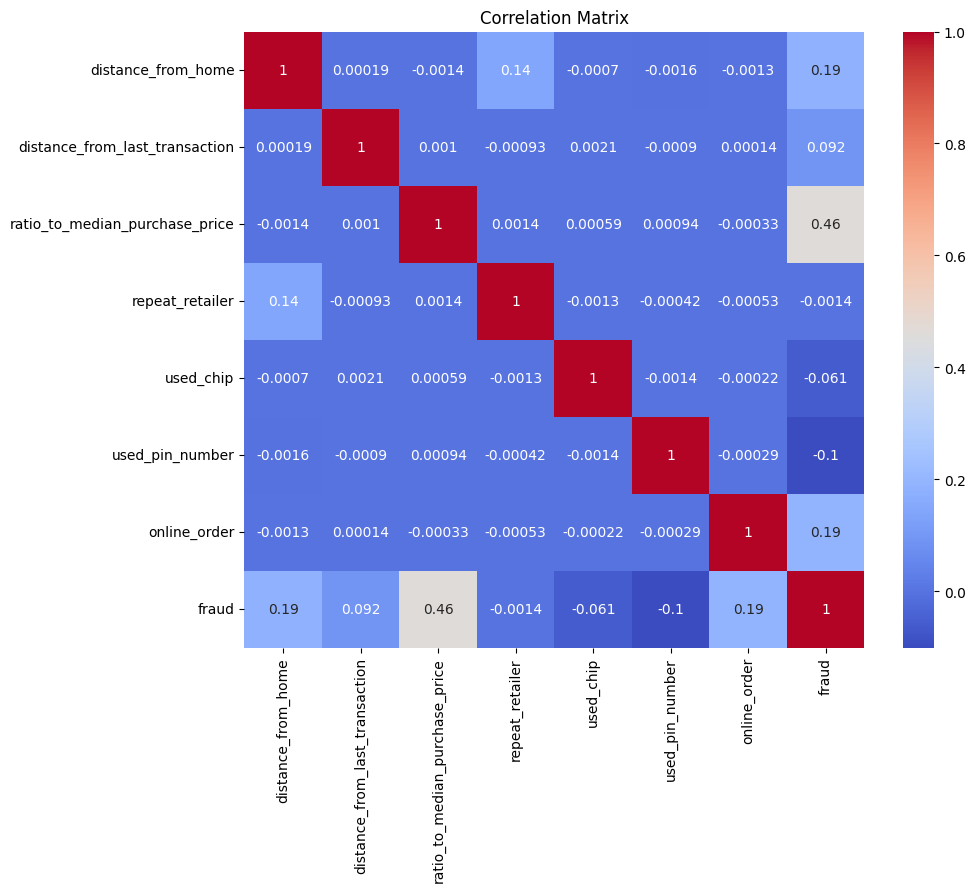

In [20]:
# Assuming df is your DataFrame
correlation = credit_card_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Now our Data are Uniformly Distributed

In [21]:
new_dataset["fraud"].value_counts()

fraud
0.0    87403
1.0    87403
Name: count, dtype: int64

In [22]:
new_dataset.groupby("fraud").mean()

distance_from_home  distance_from_last_transaction  \
fraud                                                       
0.0             22.466884                        4.349543   
1.0             66.261876                       12.712185   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
fraud                                                               
0.0                          1.419451         0.879592   0.359805   
1.0                          6.006323         0.880119   0.256399   

       used_pin_number  online_order  
fraud                                 
0.0           0.109264      0.622702  
1.0           0.003123      0.946318

# splitting Data into Features And Label 

In [23]:
x = new_dataset.drop(columns="fraud", axis=1)
y = new_dataset["fraud"]

# Train Test Splitt 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
print(x.shape, x_train.shape, x_test.shape)

(174806, 7) (139844, 7) (34962, 7)


In [26]:
x_test

distance_from_home  distance_from_last_transaction  \
209840            8.398817                        0.170364   
734677            4.102881                        1.002307   
930250           16.563472                       61.203427   
634785            5.901341                        0.355512   
129856           16.779038                        0.009369   
...                    ...                             ...   
278907            4.079964                        7.909655   
184337            5.955887                        1.427851   
569939            9.681460                        1.633855   
666003            1.379553                        1.624456   
239415            9.730156                        0.276534   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
209840                        0.378318              1.0        0.0   
734677                        0.775313              1.0        0.0   
930250                        1.954089              1.0        0.0   
634785                        4.434399              1.0        1.0   
129856                       18.606232              1.0        0.0   
...                                ...              ...        ...   
278907                        0.443877              1.0        0.0   
184337                        0.752264              1.0        1.0   
569939                        3.413464              1.0        0.0   
666003                        0.073491              0.0        0.0   
239415                        6.940812              1.0        0.0   

        used_pin_number  online_order  
209840              0.0           1.0  
734677              0.0           1.0  
930250              0.0           1.0  
634785              0.0           1.0  
129856              0.0           1.0  
...                 ...           ...  
278907              0.0           1.0  
184337              0.0           0.0  
569939              1.0           1.0  
666003              0.0           1.0  
239415              0.0           1.0  

[34962 rows x 7 columns]

# Model Training 

# Logistic Regression

In [27]:
lr_model = LogisticRegression()

In [28]:
lr_model.fit(x_train, y_train)

C:\Users\Dubai Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation 

In [29]:
# training data accuracy
train_data_pred = lr_model.predict(x_train)
# accuracy score 
train_data_accuracy = accuracy_score(train_data_pred, y_train)

In [30]:
print("Accuracy Score : ", train_data_accuracy)

Accuracy Score :  0.9417279254025914


In [31]:
# test data accuracy 
test_data_pred = lr_model.predict(x_test)
# accuracy_score
test_data_accuracy = accuracy_score(test_data_pred, y_test)

In [32]:
print("Accuracy Score : ", test_data_accuracy)
# lr_model.score(x_test, y_test)

Accuracy Score :  0.9406498484068417


# Random Forest Classifier

In [33]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)


RandomForestClassifier()

In [34]:
rf_model.score(x_test, y_test)

0.9999713975173045

In [35]:
print(rf_model.score(x_train, y_train)*100, rf_model.score(x_test, y_test)*100)

100.0 99.99713975173044


# Save the Model 

In [36]:
import joblib
filname = "lr Credit card fraud Prediction.pkl"
joblib.dump(lr_model, filname)

['lr Credit card fraud Prediction.pkl']

In [37]:
model = joblib.load(filname)
# prediction = model.predict([])

# Save Random Forest Classifier model 

In [38]:
import joblib
filename = "my_RFC_model Credit card fraud Prediction.joblib"
joblib.dump(lr_model, filename)

['my_RFC_model Credit card fraud Prediction.joblib']

In [39]:
# load the model 
RF_model = joblib.load(filename)
# prediction = RF_model.predict()

# Load the Model and Check Prediction

In [40]:
loaded_LR_model = joblib.load(filname)

# Create a numpy array with your test values
x_test_data = np.array([[9.730156,0.276534,6.940812,1.0,0.0,0.0,1.0]])
# x_test_data = x_test[52.824875,0.585164,0.635282,1.0,0.0,0.0,0.0]

prediction = loaded_LR_model.predict(x_test_data)

C:\Users\Dubai Computers\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [41]:
prediction

array([1.])